In [861]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [863]:
data = pd.read_csv('youth_data.csv')
data.columns

Index(['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM',
       'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'MRJFLAG', 'ALCFLAG',
       'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS',
       'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ',
       'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2',
       'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND',
       'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM',
       'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10',

In [865]:
column_rename = { 
'IRALCFY':'Alcohol_Frequency_Year', 
'IRMJFY':'Marijuana_Freuency_Year',
'IRCIGFM':'Cigarette_Frequency_Month',
'IRALCFM':'Alcohol_Frequency_Month',
'IRMJFM': 'Marijuana_Frequency_Month',
'IRCIGAGE':'Cigarette_Age_First_Use',
'IRSMKLSSTRY':'Smokeless_Tobacco_First_Use',
'IRALCAGE':'Alcohol_Age_First_Use',
'IRMJAGE':'Marijuana_Age_First_Use',
'MRJFLAG':'Marijuana_Use_Flag', 
'ALCFLAG':'Alcohol_Use_Flag', 
'TOBFLAG':'Tobacco_Use_Flag',
'ALCYDAYS':'Alcohol_Days_last_year',
'MRJYDAYS':'Marijuana_Days_Last_Year',
'ALCMDAYS':'Alcohol_days_Last_month',
'MRJMDAYS':'Marijuana_days_Last_month',
'CIGMDAYS':'Cigarette_days_Last_month',
'PARCHKHW': 'parents_check_homework',
'PARHLPHW': 'parents_help_with_homework',
'PRMJEVR2': 'parents_know_marijuana_use_ever',
'PRMJMO': 'parents_know_marijuana_use_this_month',
'PRLMTTV2': 'parents_limit_tv_time',
'PRPROUD2': 'parents_express_pride',
'PRGDJOB2': 'parents_encourage_good_job',
'PRALDLY2': 'parents_know_alcohol_use',
'YOSELL2': 'youth_sold_illegal_items',
'YOSTOLE2': 'youth_stole_something',
'YOATTAK2': 'youth_attacked_someone',
'YOFIGHT2': 'youth_in_fight',
'YOHGUN2': 'youth_carried_handgun',
'YOGRPFT2': 'youth_in_group_fight',
'SCHFELT': 'feeling_about_school',
'AVGGRADE': 'average_grade',
'ARGUPAR': 'argue_with_parents',
'TALKPROB': 'talk_about_personal_problems',
'PRTALK3': 'talk_with_parents_about_problems',
'PRBSOLV2': 'solve_problems_with_parents',
'FRDMJMON': 'friends_use_marijuana_monthly',
'FRDMEVR2': 'friends_ever_used_marijuana',
'STNDSMJ': 'think_marijuana_is_harmful',
'STNDALC': 'think_alcohol_is_harmful',
'STNDDNK': 'think_binge_drinking_is_harmful',
'RLGIMPT': 'religion_is_important',
'RLGDCSN': 'religion_guides_decisions',
'RLGATTD': 'attend_religious_services',
'RLGFRND': 'friends_share_religious_views',
'FRDADLY2': 'friends_use_alcohol_daily',
'YFLMJMO': 'peer_pressure_marijuana_this_month',
'YFLTMRJ2': 'peer_pressure_marijuana_last_year',
'YFLADLY2': 'peer_pressure_alcohol_daily',
'IRSEX': 'Gender', 
'NEWRACE2':'Race', 
'HEALTH2':'Overall_Health',    
'IMOTHER':'Mother_Presence', 
'IFATHER':'Father_Presence', 
'INCOME':'Total_Income', 
'POVERTY3':'Poverty_Level',
'PDEN10':'Population_Density',
'COUTYP4': 'County_Type' 
}

In [867]:
data.rename(columns=column_rename, inplace=True) 
data.columns 

Index(['Alcohol_Frequency_Year', 'Marijuana_Freuency_Year',
       'Cigarette_Frequency_Month', 'IRSMKLSS30N', 'Alcohol_Frequency_Month',
       'Marijuana_Frequency_Month', 'Cigarette_Age_First_Use',
       'Smokeless_Tobacco_First_Use', 'Alcohol_Age_First_Use',
       'Marijuana_Age_First_Use', 'Marijuana_Use_Flag', 'Alcohol_Use_Flag',
       'Tobacco_Use_Flag', 'Alcohol_Days_last_year',
       'Marijuana_Days_Last_Year', 'Alcohol_days_Last_month',
       'Marijuana_days_Last_month', 'Cigarette_days_Last_month', 'SMKLSMDAYS',
       'feeling_about_school', 'TCHGJOB', 'average_grade', 'STNDSCIG',
       'think_marijuana_is_harmful', 'think_alcohol_is_harmful',
       'think_binge_drinking_is_harmful', 'parents_check_homework',
       'parents_help_with_homework', 'PRCHORE2', 'parents_limit_tv_time',
       'PARLMTSN', 'parents_encourage_good_job', 'parents_express_pride',
       'argue_with_parents', 'youth_in_fight', 'youth_in_group_fight',
       'youth_carried_handgun', 'youth_sold

In [869]:
#Function to retrieve unique values in each row
def uniqueColumns(data):
    for col in data.columns:
        print(f"'{col}':{data[col].unique()}")

If we see the data there are null values in the data related to youth experience question so we need to remove nan values from those columns.

In [872]:
selected_features = [
    'friends_use_marijuana_monthly',
    'friends_ever_used_marijuana',
    'friends_use_alcohol_daily',
    'peer_pressure_marijuana_this_month',
    'peer_pressure_marijuana_last_year',
    'peer_pressure_alcohol_daily',
    'parents_check_homework',
    'parents_help_with_homework',
    'parents_know_marijuana_use_ever',
    'parents_know_marijuana_use_this_month',
    'parents_limit_tv_time',
    'parents_express_pride',
    'parents_encourage_good_job',
    'parents_know_alcohol_use',
    'youth_sold_illegal_items',
    'youth_stole_something',
    'youth_attacked_someone',
    'youth_in_fight',
    'youth_carried_handgun',
    'youth_in_group_fight',
    'feeling_about_school',
    'average_grade',
    'argue_with_parents',
    'talk_about_personal_problems',
    'talk_with_parents_about_problems',
    'solve_problems_with_parents',
    'think_marijuana_is_harmful',
    'think_alcohol_is_harmful',
    'think_binge_drinking_is_harmful',
    'religion_is_important',
    'religion_guides_decisions',
    'attend_religious_services',
    'friends_share_religious_views']


In [874]:
#Removing nan values from the youth experience data
youth_data = data.loc[:, selected_features]
data.dropna(subset = youth_data.columns, inplace = True)

In [876]:
data.dropna(subset = ['Overall_Health'], inplace = True)

In [878]:
#Cleaning the demographic details
#The 'EDUSCHGRD2' column has values 98,99 which indicates blank/skip so we can remove that data.
# The 'EDUSKPCOM' column has values 94,97,98,99 which indicates blank/skip so removing that data.
# The 'IMOTHER' or 'IFATHER' column has value 3 which mean the response is don't know so dropping the columns.
data = (
    data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
    [data['Father_Presence'] != 3]

).reset_index(drop=True)

/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_3336/2527575588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_3336/2527575588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_3336/2527575588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_3336/2527575588.py:6: U

In [880]:
data.shape

(5932, 79)

In [882]:
uniqueColumns(data)

'Alcohol_Frequency_Year':[991   1 993   2   3  13  12   4   5   6 104  25  52  60  36 134 168  17
  24  84  72  48  14  20 245  49  15 240  10   8   7  11  37  26 246 120
  96 180 156  31  50  30   9  16  21 208  55  29  54  32  27  38  18  81
 108 260  46  22  35  40  19 144  73  28 112 175  56 339  42 100 312  86
  67]
'Marijuana_Freuency_Year':[991  60 240   8  36   2 150 993   7  37  12  24   9  58  52 156   6  67
  35  48   1 120  13 130 365 208  96  72  25 104 127   4   5   3 168 260
 110  27 364 179  20  34 355 144  90  29 180 108 312 288  84  46 128  56
 353  23  28  30  18 135  16 363 155  10 105  40  85  11  47  15  45 250
 358 252 300  98 320  21 264  31  19 184 342  17 336 348  22 136  68 230
 261  38 362  51  97  43  14  78  50  42  69 100  32 350  99  33 206 340
  93]
'Cigarette_Frequency_Month':[91. 93.  1.  3.  2. 10.  7. 30.  4. 25. 15. 13. 20.  5.  8. 23.  6.]
'IRSMKLSS30N':[91 93  3  4 20 30  1 15  2  5  7 18]
'Alcohol_Frequency_Month':[91.  93.   1.   2.   3.   5.  

In [908]:
# Youth experiences data
youth_data = data.loc[:, selected_features]

#demographic details
demographic_data = data.loc[:, 'Gender':'County_Type']

#concatinating both dataframes to a single dataframe and considered as input features.
X = pd.concat([youth_data, demographic_data], axis=1)

# target variable 'Alcohol_Use_Flag'
Y = data.loc[:,'Marijuana_Use_Flag']

In [910]:
X.shape

(5932, 46)

## Binary Classification

This is to classify whether the youth use marijuana or not. The features used are youth demographic details, youth experiences data.

#### Method1: Decision Tree Classifier

In [915]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [917]:
#Fitting the decision tree classifier
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

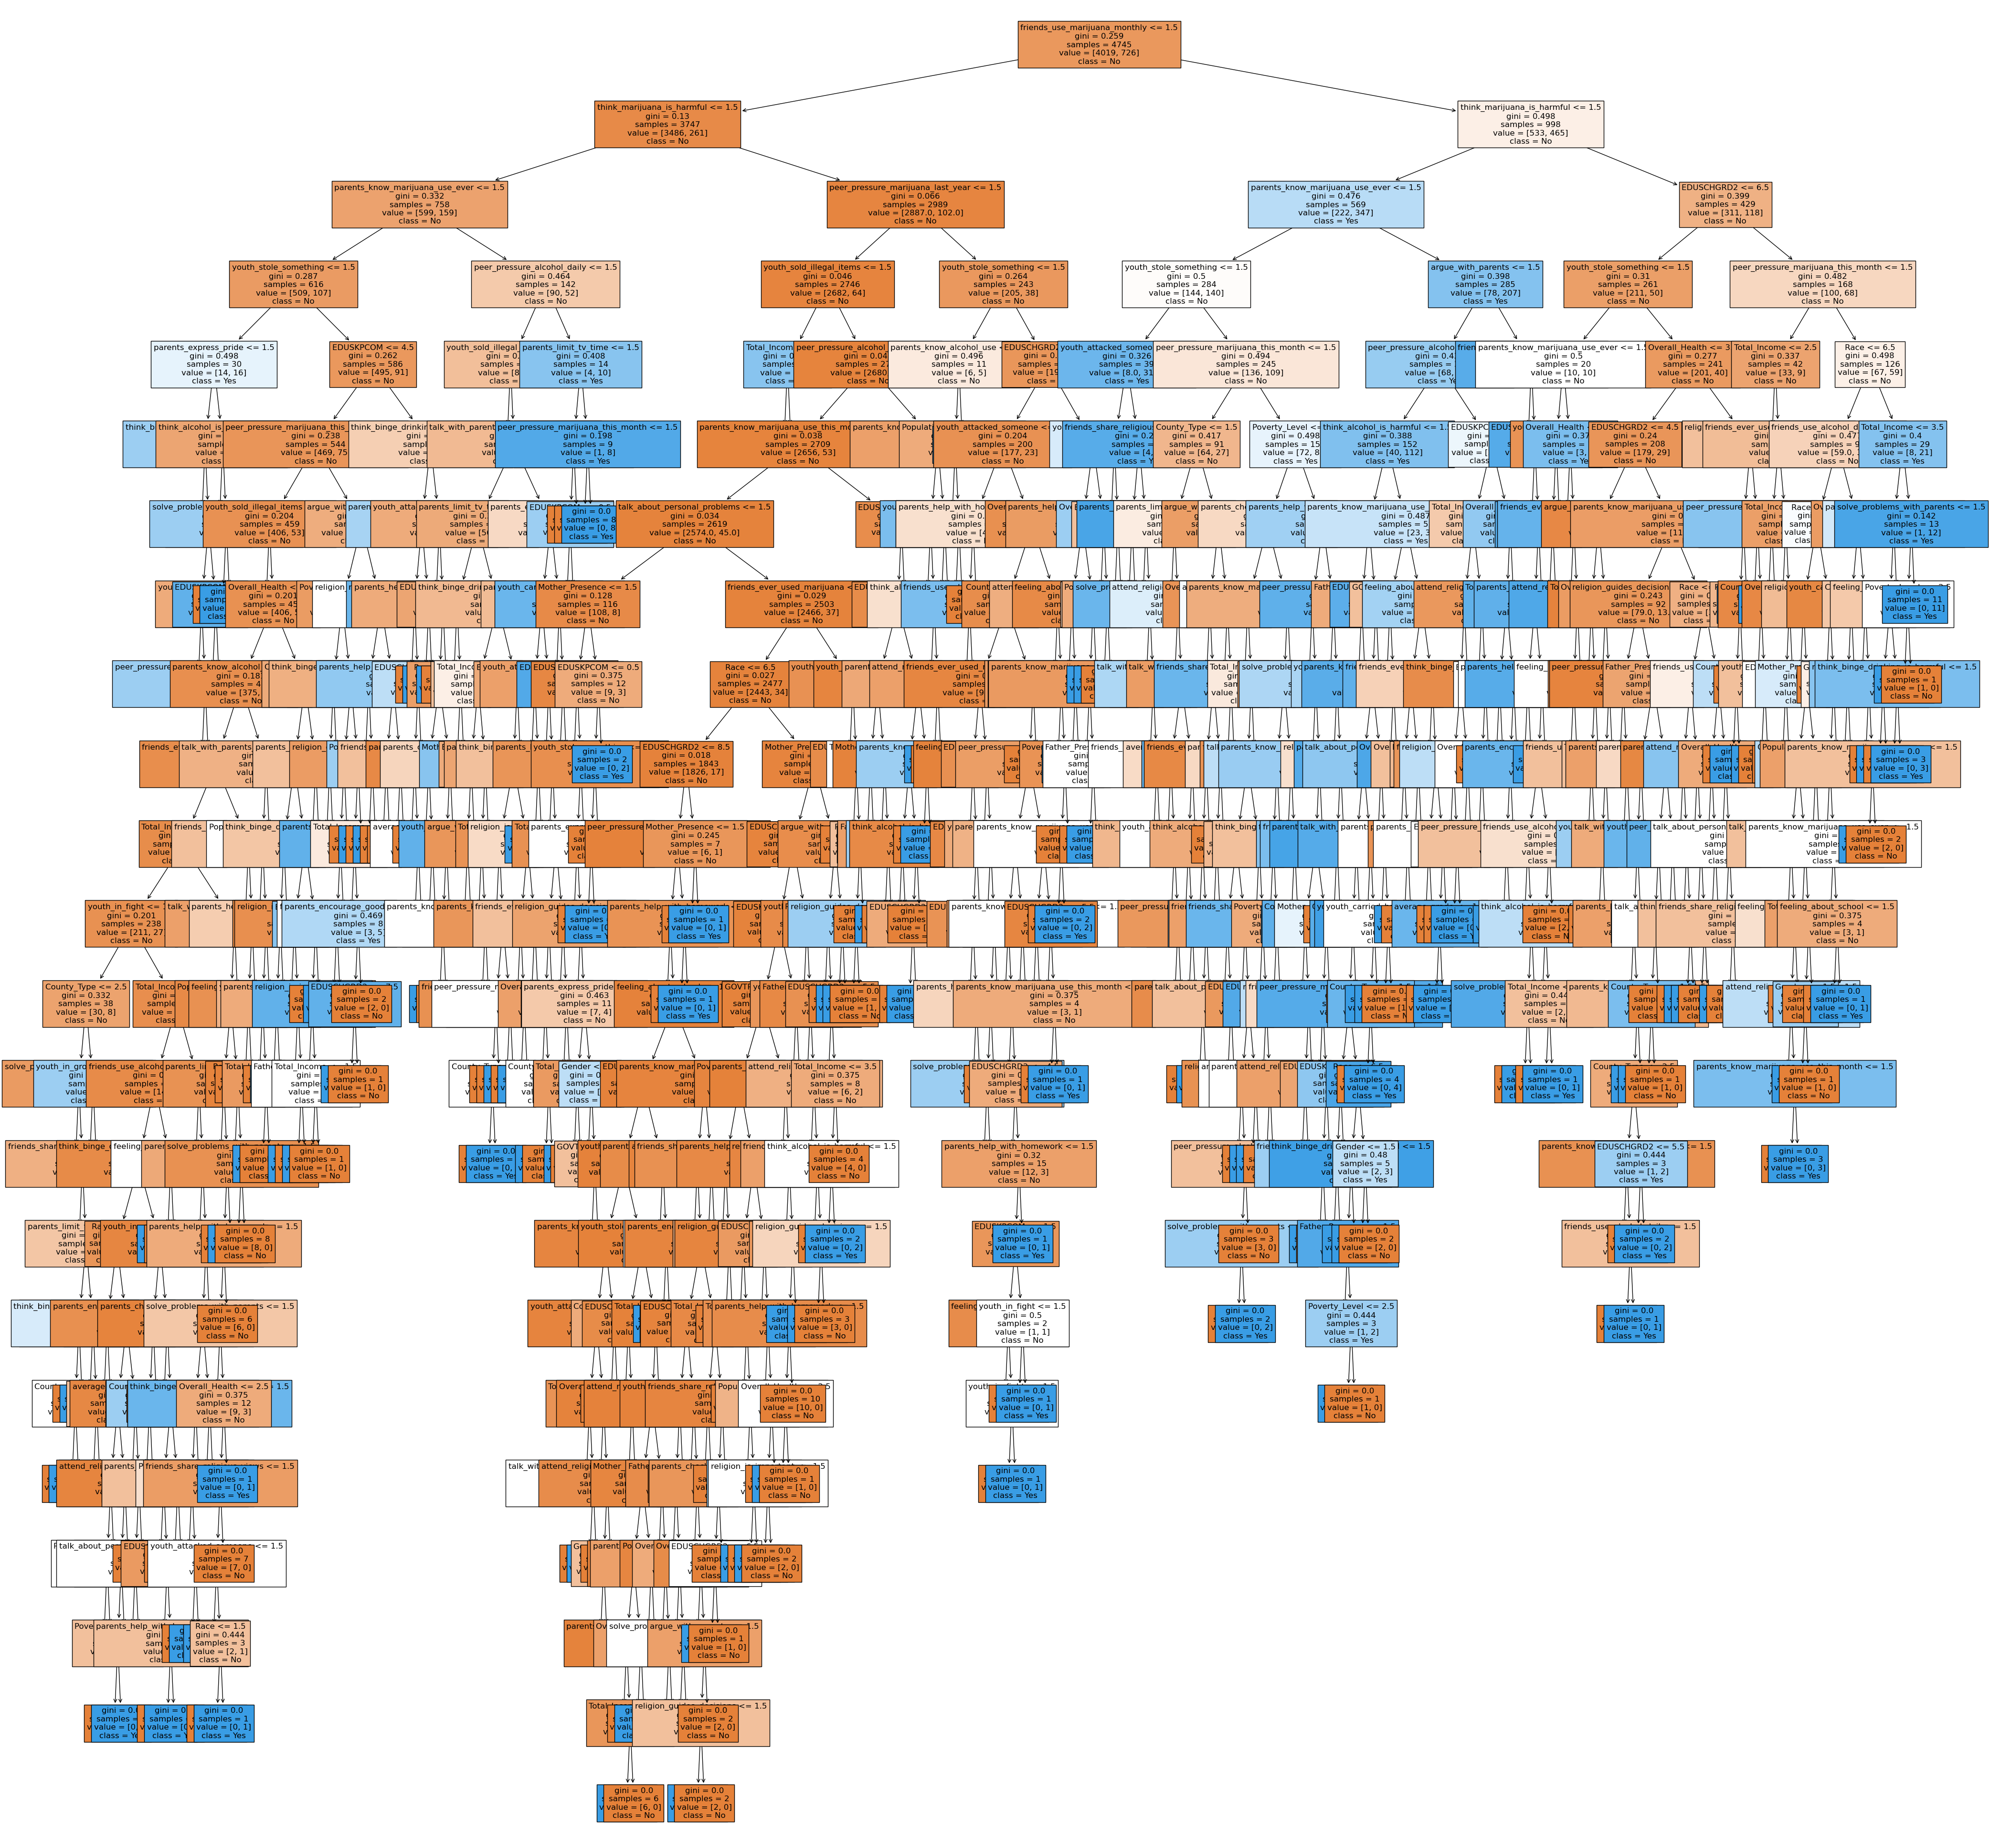

In [919]:
plt.figure(figsize=(50,50))
plot_tree(tree
          , filled=True
          , feature_names=X.columns
          , class_names=['No', 'Yes']
          , label='all'
          , fontsize=12)
plt.show()

In [920]:
accuracy = tree.score(X_test, y_test)
print("Accuracy of decision tree model: {:.2f}%".format(accuracy*100))

Accuracy of decision tree model: 84.08%


In [921]:
importances = pd.DataFrame({'feature_name': X.columns, 'importance': tree.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0    friends_use_marijuana_monthly    0.201259
1       think_marijuana_is_harmful    0.074915
2                       EDUSCHGRD2    0.054801
3                   Overall_Health    0.039572
4                        EDUSKPCOM    0.039489
5                     Total_Income    0.037565
6                             Race    0.033814
7  parents_know_marijuana_use_ever    0.032425
8                      County_Type    0.029300
9            youth_stole_something    0.022261

#### PRUNING

The optimal tree size: 11


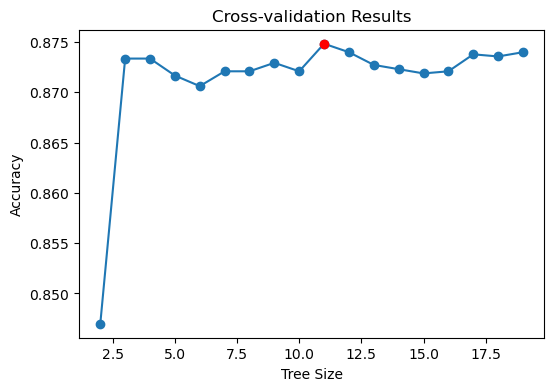

In [940]:
# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree = GridSearchCV(tree, params, cv=5)
cv_tree.fit(X_train, y_train)
cv_results = cv_tree.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree.best_params_['max_leaf_nodes']
best_score = cv_tree.best_score_

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');
print('The optimal tree size:',best_size)


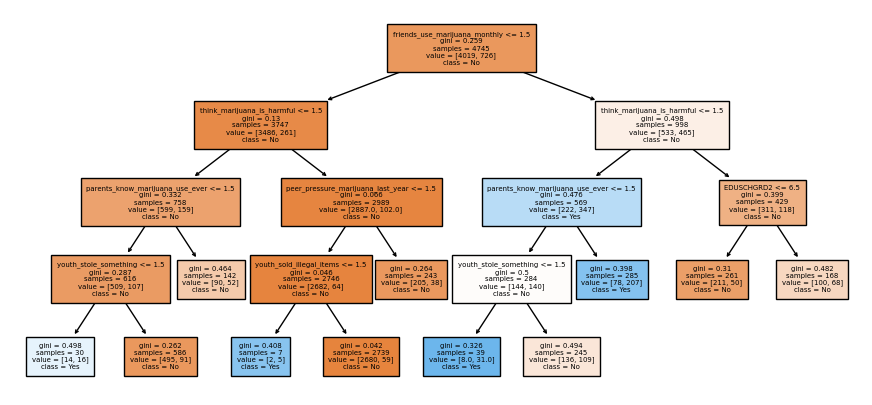

In [956]:
# prune tree using optimal size
prune_tree = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=7)
prune_tree.fit(X_train, y_train)

# plot pruned tree
plt.figure(figsize=(11,5))
plt.title('Pruned Tree')
plot_tree(prune_tree, feature_names=X_train.columns, filled=True, fontsize = 5,class_names = ['No','Yes']);

In [950]:
prune_tree.classes_

array([0, 1])

In [952]:
# Calculate the accuracy of the decision tree on the test data
accuracy_pr = prune_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_pr*100))

Accuracy: 87.87%


#### Bagging

In [527]:
Tree_bagging = RandomForestClassifier(max_features=X_train.shape[1],random_state = 1)
Tree_bagging.fit(X_train,y_train)

RandomForestClassifier(max_features=46, random_state=1)

In [529]:
y_pred_bag = Tree_bagging.predict(X_test)
# Calculate the accuracy of the bagging model on the test data
accuracy_bag = Tree_bagging.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_bag*100))

Accuracy: 87.28%


In [531]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_bagging.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0       friends_use_marijuana_monthly    0.191164
1          think_marijuana_is_harmful    0.075085
2                          EDUSCHGRD2    0.056238
3                      Overall_Health    0.040396
4                           EDUSKPCOM    0.040329
5                                Race    0.034872
6                        Total_Income    0.030728
7  peer_pressure_marijuana_this_month    0.029696
8                         County_Type    0.024978
9     parents_know_marijuana_use_ever    0.024844

In [533]:
print("Number of trees:", Tree_bagging.n_estimators)
print("Number of features tried at each split:",Tree_bagging.max_features)

Number of trees: 100
Number of features tried at each split: 46


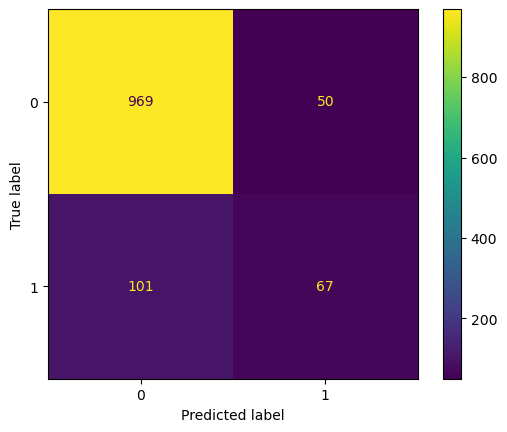

In [535]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bag)

#### Random Forest

In [538]:
Tree_random = RandomForestClassifier(max_features=23,random_state = 1)
Tree_random.fit(X_train,y_train)

y_pred_bag = Tree_bagging.predict(X_test)
# Calculate the accuracy of the random forest model on the test data
accuracy_rf = Tree_random.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_rf*100))

Accuracy: 88.04%


In [540]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_random.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0       friends_use_marijuana_monthly    0.113779
1          think_marijuana_is_harmful    0.071788
2  peer_pressure_marijuana_this_month    0.055891
3                          EDUSCHGRD2    0.055149
4         friends_ever_used_marijuana    0.044291
5                      Overall_Health    0.038216
6                           EDUSKPCOM    0.037868
7                                Race    0.034127
8                        Total_Income    0.029794
9                         County_Type    0.024353

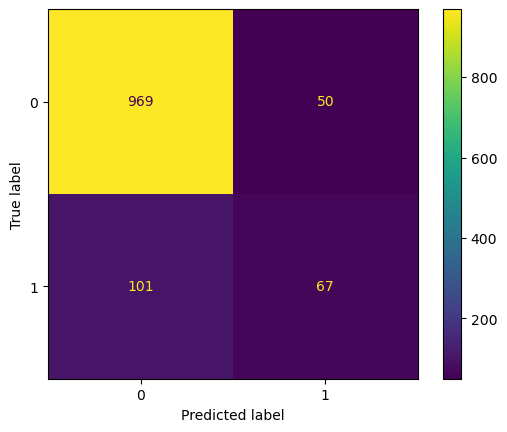

In [542]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bag)

#### Boosting

In [545]:
#Defining parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create model
gb_model = GradientBoostingClassifier(random_state=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 150}


In [547]:
Tree_Boosting = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate'], max_depth=4, random_state=1)
Tree_Boosting.fit(X_train,y_train)
y_pred = Tree_Boosting.predict(X_test)
accuracy_bst = Tree_Boosting.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_bst*100))

Accuracy: 88.04%


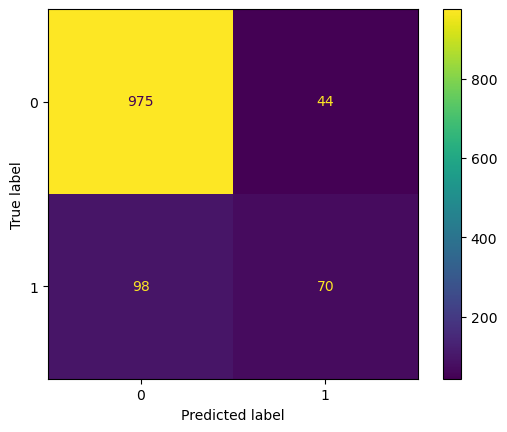

In [549]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Text(0.5, 1.0, 'Variable importance for Boosting model')

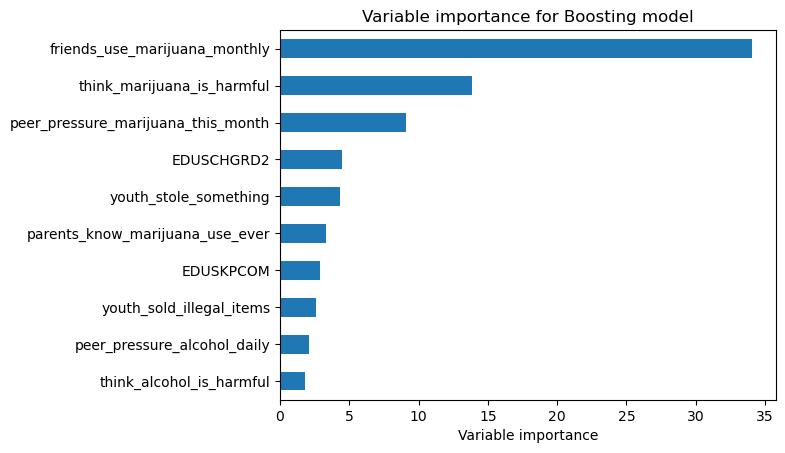

In [551]:
feature_importance = Tree_Boosting.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable importance for Boosting model')

## Multi-Class Classification

This involves predicting number of days of marijuana use in the past year. Our target feature is 'Marijuana_Days_Last_Year'\
1 = 1-11 Days - Rarely
2 = 12-49 Days - Occasionally
3 = 50-99 Days - Sometimes
4 = 100-299 Days - Frequently
5 = 300-365 Days - Almost daily
6 = No Past Year Use 

In [578]:
mrjydays_labels = {
    1: 'Rarely',
    2: 'Occasionally',
    3: 'Sometimes',
    4: 'Frequently',
    5: 'Almost Daily',
    6: 'No Past Year Use'
}
youth_data = data.loc[:, selected_features]

#demographic details
demographic_data = data.loc[:, 'Gender':'County_Type']

#concatinating both dataframes to a single dataframe and considered as input features.
X = pd.concat([youth_data, demographic_data], axis=1)
data['Marijuana_Days_Last_Year_Levels'] = data['Marijuana_Days_Last_Year'].map(mrjydays_labels)
# target variable 'Alcohol_Use_Flag'
Y = data.loc[:,'Marijuana_Days_Last_Year_Levels']

In [580]:
Y.value_counts()

Marijuana_Days_Last_Year_Levels
No Past Year Use    5187
Rarely               245
Occasionally         189
Frequently           180
Sometimes             75
Almost Daily          56
Name: count, dtype: int64

In [582]:
#Splitting the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [584]:
#Fitting the decision tree classifier
tree_m = DecisionTreeClassifier(random_state = 1)
tree_m.fit(X_train, y_train)

#finding the accuracy of the descision tree on test data
accuracy = tree_m.score(X_test, y_test)
print("Accuracy of decision tree model: {:.2f}%".format(accuracy*100))

Accuracy of decision tree model: 80.90%


In [586]:
importances = pd.DataFrame({'feature_name': X.columns, 'importance': tree_m.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0  friends_use_marijuana_monthly    0.102709
1                     EDUSCHGRD2    0.064962
2                 Overall_Health    0.051060
3                      EDUSKPCOM    0.046390
4     think_marijuana_is_harmful    0.040130
5                           Race    0.038242
6                   Total_Income    0.036354
7                    County_Type    0.027062
8                  Poverty_Level    0.025868
9                         Gender    0.025596

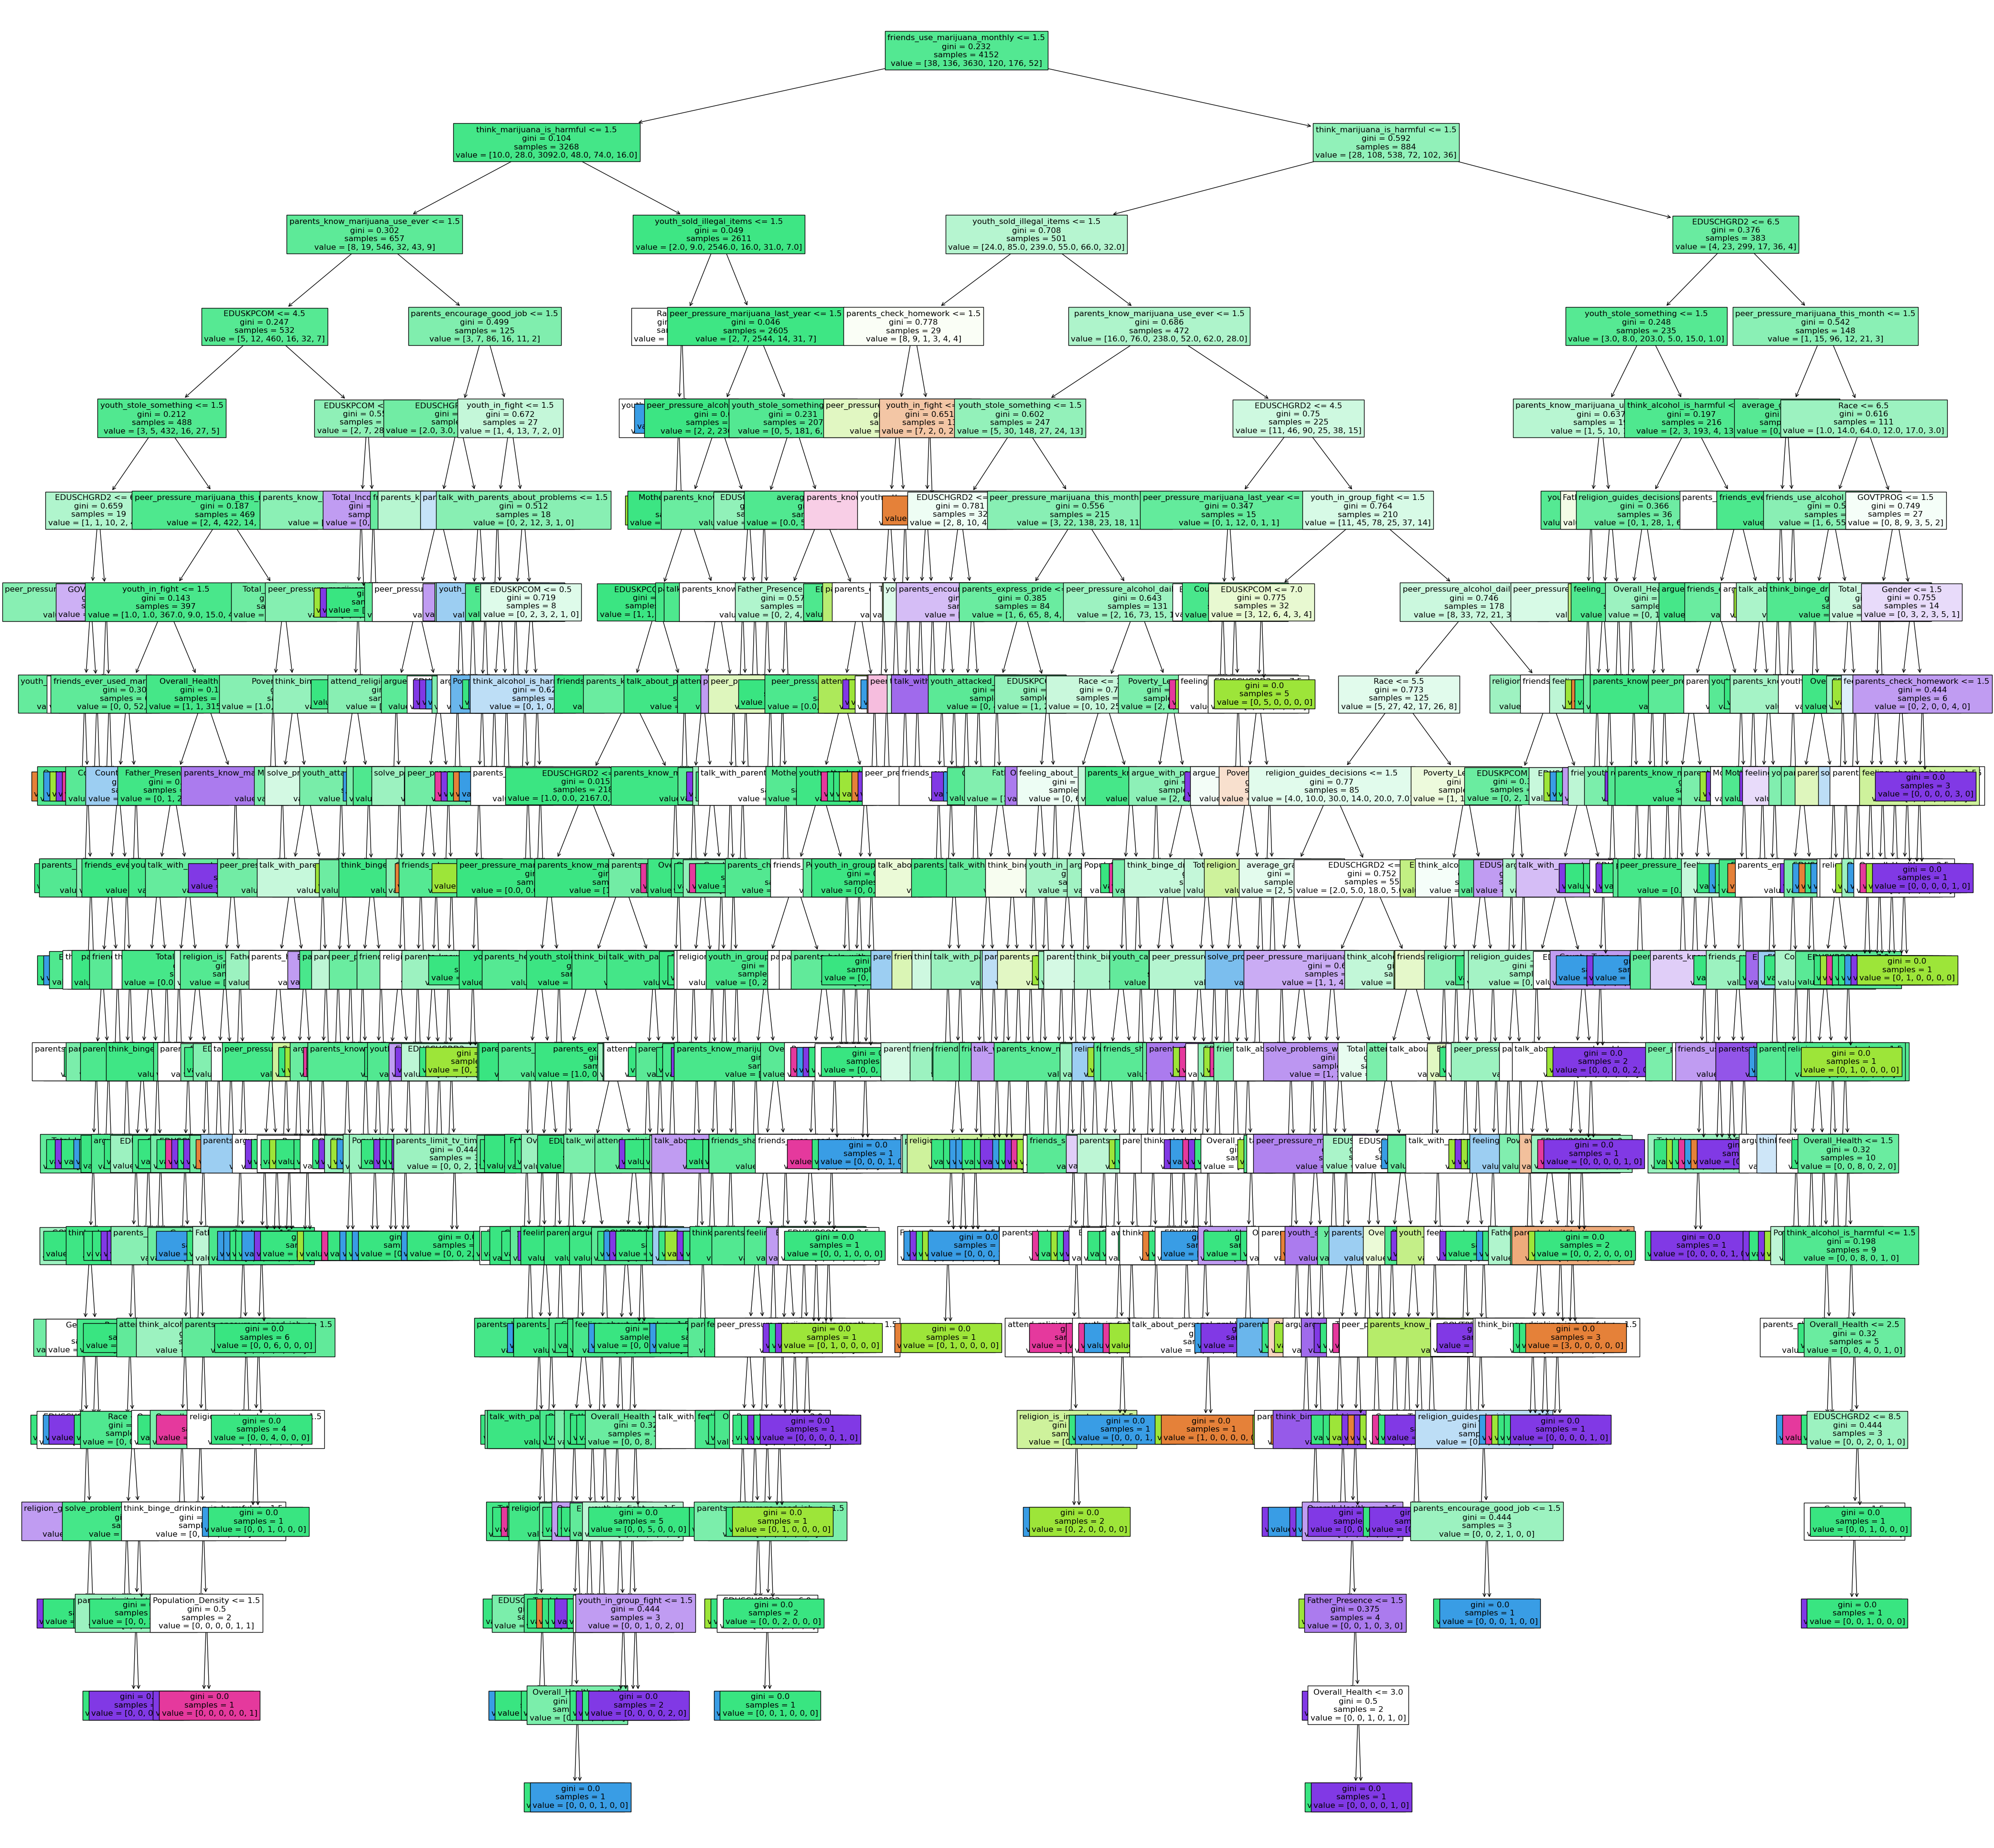

In [588]:
plt.figure(figsize=(50,50))
plot_tree(tree_m
          , filled=True
          , feature_names=X.columns
          , label='all'
          , fontsize=12)
plt.show()

### Pruning

The optimal tree size: 2


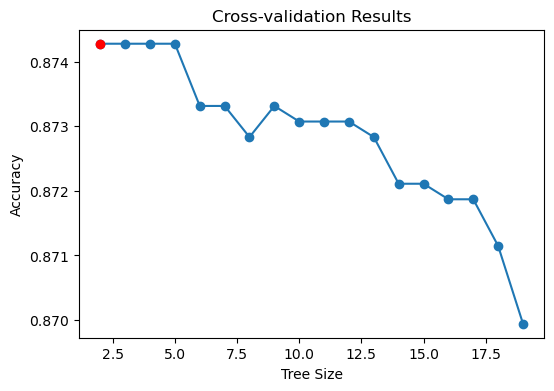

In [591]:
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree_m = GridSearchCV(tree_m, params, cv=5)
cv_tree_m.fit(X_train, y_train)
cv_results_m = cv_tree_m.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree_m.best_params_['max_leaf_nodes']
best_score = cv_tree_m.best_score_

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results_m["param_max_leaf_nodes"], cv_results_m["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');
print('The optimal tree size:',best_size)

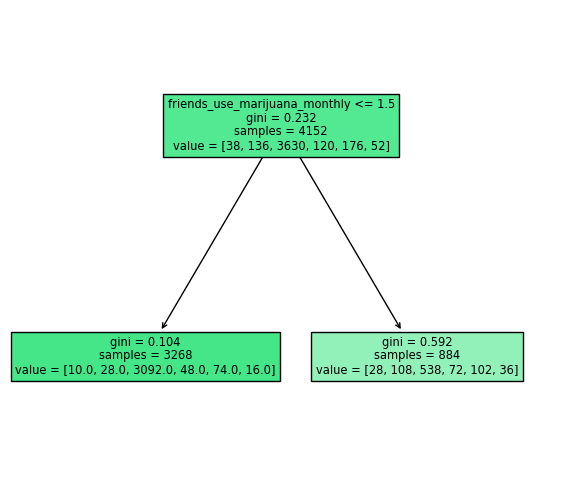

In [593]:
# prune tree using optimal size
prune_tree_m = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=7)
prune_tree_m.fit(X_train, y_train)

# plot pruned tree
plt.figure(figsize=(7,6))
plt.title('Pruned Tree')
plot_tree(prune_tree_m, feature_names=X_train.columns, filled=True);

In [740]:
prune_tree_m.classes_

array(['Almost Daily', 'Frequently', 'No Past Year Use', 'Occasionally',
       'Rarely', 'Sometimes'], dtype=object)

In [595]:
accuracy_tree_m = prune_tree_m.score(X_test,y_test)
print("Accuracy of the pruned tree in multi-class classifcation:",accuracy_tree_m)

Accuracy of the pruned tree in multi-class classifcation: 0.8747191011235955


In [597]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': prune_tree_m.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0    friends_use_marijuana_monthly         1.0
1                             Race         0.0
2      solve_problems_with_parents         0.0
3       think_marijuana_is_harmful         0.0
4         think_alcohol_is_harmful         0.0
5  think_binge_drinking_is_harmful         0.0
6            religion_is_important         0.0
7        religion_guides_decisions         0.0
8        attend_religious_services         0.0
9    friends_share_religious_views         0.0

[Text(0, 0, 'Almost Daily'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'No Past Year Use'),
 Text(3, 0, 'Occasionally'),
 Text(4, 0, 'Rarely'),
 Text(5, 0, 'Sometimes')]

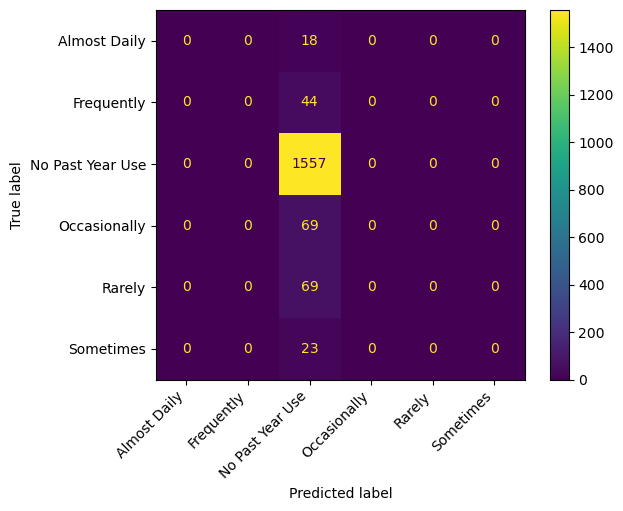

In [599]:
y_pred = prune_tree_m.predict(X_test)
disp=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_xticklabels(disp.display_labels, rotation=45, ha='right')

In [601]:
X_test.shape

(1780, 46)

If we see the above heatmap due to imbalance in the trained data the model is trying to predict by default 'No Past Year Use' to boost the accuracy. Therefore the optimal tree size choosen by the cross validation is 2.

### Bagging

In [605]:
Tree_m_bagging = RandomForestClassifier(max_features=X_train.shape[1],random_state = 1)
Tree_m_bagging.fit(X_train,y_train)
Accuracy_bag = Tree_m_bagging.score(X_test, y_test)
print("The accuracy of the bagging model for multi-class classification:",Accuracy_bag)

The accuracy of the bagging model for multi-class classification: 0.8702247191011236


In [607]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_m_bagging.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0  friends_use_marijuana_monthly    0.088167
1                     EDUSCHGRD2    0.063893
2                      EDUSKPCOM    0.051795
3                 Overall_Health    0.046679
4                           Race    0.041761

### Random Forest

In [610]:
Tree_m_rf = RandomForestClassifier(max_features=23,random_state = 1)
Tree_m_rf.fit(X_train,y_train)
Accuracy_rf = Tree_m_rf.score(X_test, y_test)
print("The accuracy of the bagging model for multi-class classification:",Accuracy_rf)

The accuracy of the bagging model for multi-class classification: 0.8713483146067416


[Text(0, 0, 'Almost Daily'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'No Past Year Use'),
 Text(3, 0, 'Occasionally'),
 Text(4, 0, 'Rarely'),
 Text(5, 0, 'Sometimes')]

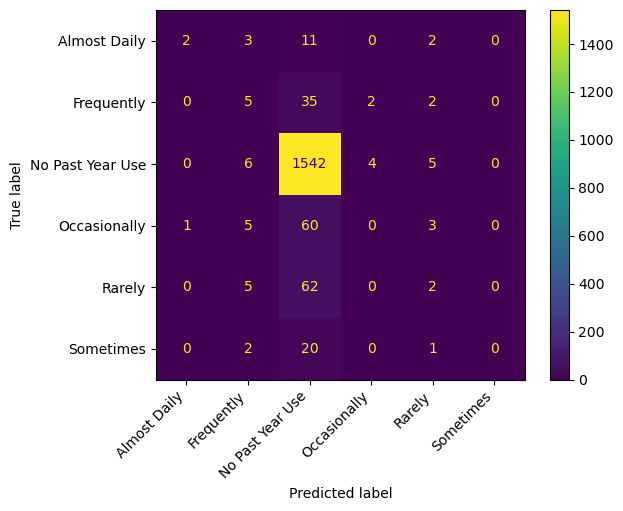

In [612]:
y_pred = Tree_m_rf.predict(X_test)
disp=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_xticklabels(disp.display_labels, rotation=45, ha='right')

In [614]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_m_rf.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0                          EDUSCHGRD2    0.061826
1       friends_use_marijuana_monthly    0.057311
2                           EDUSKPCOM    0.050946
3                      Overall_Health    0.046776
4  peer_pressure_marijuana_this_month    0.044624

### Boosting

In [617]:
#Defining parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create model
gb_model = GradientBoostingClassifier(random_state=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}


In [618]:
Tree_Bst_m = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate'], max_depth=4, random_state=1)
Tree_Bst_m.fit(X_train,y_train)
y_pred = Tree_Bst_m.predict(X_test)
accuracy_bst = Tree_Bst_m.score(X_test, y_test)
print("The accuracy of the bagging model for multi-class classification:",accuracy_bst)

The accuracy of the bagging model for multi-class classification: 0.8735955056179775


[Text(0, 0, 'Almost Daily'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'No Past Year Use'),
 Text(3, 0, 'Occasionally'),
 Text(4, 0, 'Rarely'),
 Text(5, 0, 'Sometimes')]

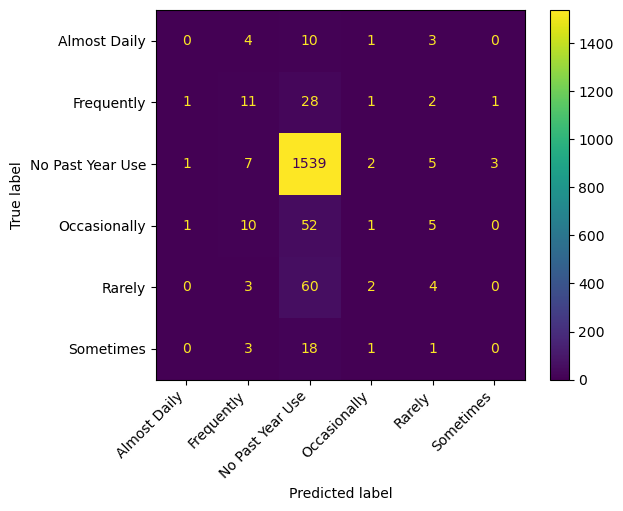

In [621]:
disp=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_xticklabels(disp.display_labels, rotation=45, ha='right')

Text(0.5, 1.0, 'Variable Importance plot for Boosting model')

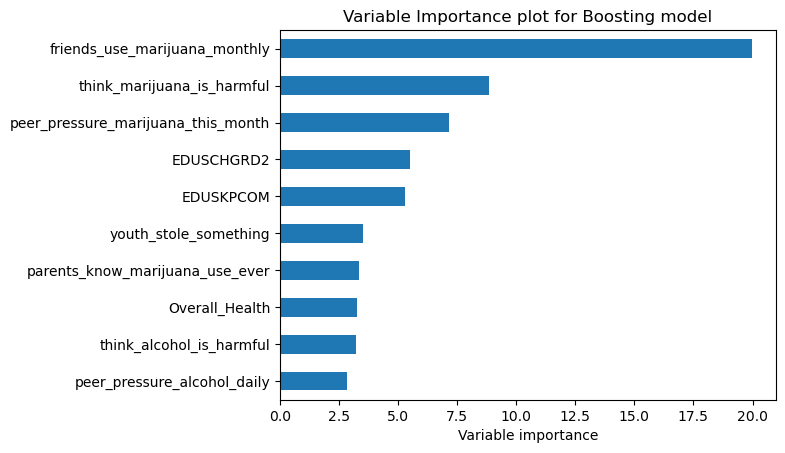

In [623]:
feature_importance = Tree_Bst_m.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable Importance plot for Boosting model')

## Regression

This involves predicting the age of first marijuana use. Our target feature is 'Marijuana_Age_First_Use'.

In [779]:
#Removing the never used(991) values from the column
data = data[data['Marijuana_Age_First_Use'] != 991]

In [781]:
youth_data = data.loc[:, selected_features]

#demographic details
demographic_data = data.loc[:, 'Gender':'County_Type']
#concatinating both dataframes to a single dataframe and considered as input features.
X = pd.concat([youth_data, demographic_data], axis=1)

# target variable 'Marijuana_Age_First_Use'
Y = data.loc[:,'Marijuana_Age_First_Use']


In [787]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size =0.3, random_state = 1)

In [789]:
y_test.shape

(269,)

In [791]:
Tree_reg = DecisionTreeRegressor(random_state = 1)
Tree_reg.fit(X_train, y_train)
y_pred_reg = Tree_reg.predict(X_test)
test_mse = ((y_test - y_pred_reg)**2).mean()
print("Mean squared error for the Decision tree for test set:",test_mse)

Mean squared error for the Decision tree for test set: 5.449814126394052


In [793]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_reg.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0             EDUSCHGRD2    0.237909
1                   Race    0.054092
2  youth_carried_handgun    0.051941
3            County_Type    0.047749
4           Total_Income    0.044701

### Pruning

The optimal tree size: 3


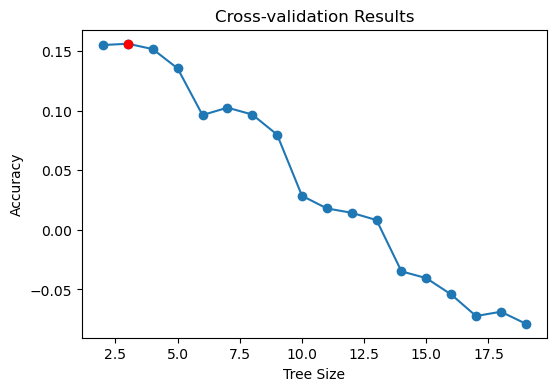

In [796]:
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree_reg = GridSearchCV(Tree_reg, params, cv=5)
cv_tree_reg.fit(X_train, y_train)
cv_results = cv_tree_reg.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree_reg.best_params_['max_leaf_nodes']
best_score = cv_tree_reg.best_score_

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');
print('The optimal tree size:',best_size)

In [798]:
prune_tree_reg = DecisionTreeRegressor(max_leaf_nodes = best_size, random_state = 1)
prune_tree_reg.fit(X_train, y_train)
y_pred = prune_tree_reg.predict(X_test)
test_mse = ((y_test - y_pred)**2).mean()
print("Mean squared error for the pruned tree for test set:",test_mse)

Mean squared error for the pruned tree for test set: 2.171226959275316


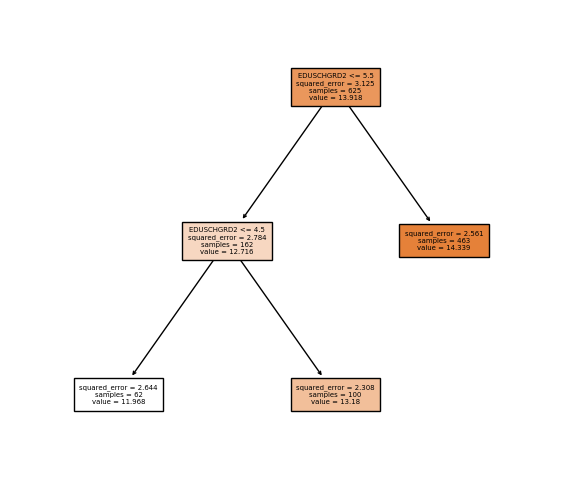

In [800]:
plt.figure(figsize=(7,6))
plt.title('Pruned Tree')
plot_tree(prune_tree_reg, feature_names=X_train.columns, filled=True, fontsize = 5);

In [742]:
X_test.shape

(1187, 46)

### Bagging

In [366]:
Tree_reg_bag = RandomForestRegressor(max_features=X_train.shape[1],random_state = 1)
Tree_reg_bag.fit(X_train,y_train)
y_pred_bag = Tree_reg_bag.predict(X_test)
test_mse = ((y_test - y_pred_bag)**2).mean()
print("Mean squared error for the bagging model with test set:",test_mse)

Mean squared error for the bagging model with test set: 1.9659229050279328


In [368]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_reg_bag.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0      EDUSCHGRD2    0.231870
1       EDUSKPCOM    0.049802
2     County_Type    0.039295
3  Overall_Health    0.035760
4            Race    0.034339

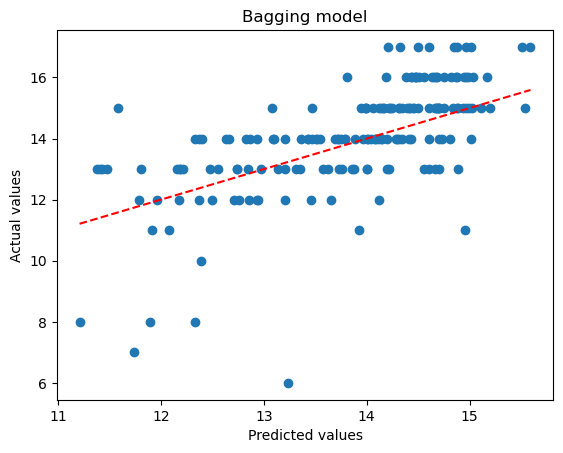

In [370]:
# plot predicted vs actual values
plt.scatter(y_pred_bag, y_test)
plt.plot([min(y_pred_bag), max(y_pred_bag)], [min(y_pred_bag), max(y_pred_bag)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Bagging model');

### RandomForest

In [644]:
Tree_reg_rf = RandomForestRegressor(max_features=30,random_state = 1)
Tree_reg_rf.fit(X_train,y_train)
y_pred_rf = Tree_reg_rf.predict(X_test)
test_mse = ((y_test - y_pred_rf)**2).mean()
print("Mean squared error for the RandomForest with test set:",test_mse)

Mean squared error for the RandomForest with test set: 1.9135849162011174


In [646]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_reg_rf.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0      EDUSCHGRD2    0.219511
1       EDUSKPCOM    0.047543
2  Overall_Health    0.038572
3     County_Type    0.038085
4            Race    0.032862

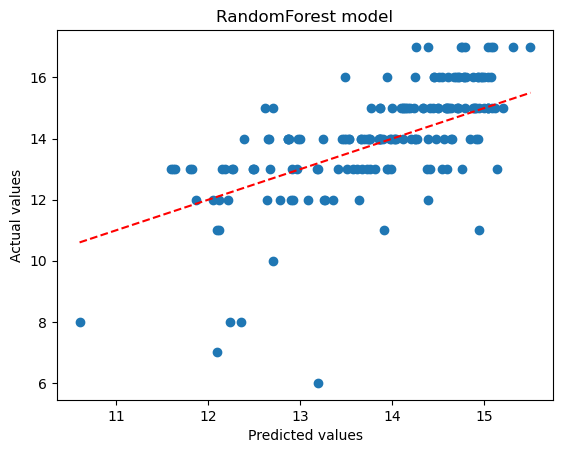

In [648]:
plt.scatter(y_pred_rf, y_test)
plt.plot([min(y_pred_rf), max(y_pred_rf)], [min(y_pred_rf), max(y_pred_rf)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('RandomForest model');

### Boosting

In [651]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create model
gb_model_reg = GradientBoostingRegressor(random_state=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(gb_model_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}


In [653]:
Tree_Bst_reg = GradientBoostingRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=4, random_state=1)
Tree_Bst_reg.fit(X_train,y_train)
y_pred_bag_reg = Tree_Bst_reg.predict(X_test)
test_mse = ((y_test - y_pred_bag_reg)**2).mean()
print("Mean squared error for the Boosting model with test set:",test_mse)

Mean squared error for the Boosting model with test set: 2.3852063644110193


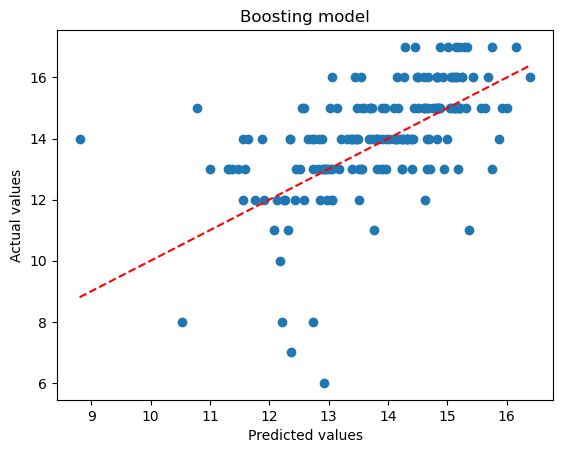

In [655]:
plt.scatter(y_pred_bag_reg, y_test)
plt.plot([min(y_pred_bag_reg), max(y_pred_bag_reg)], [min(y_pred_bag_reg), max(y_pred_bag_reg)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Boosting model');

Text(0.5, 1.0, 'Variable Importance plot for Boosting model')

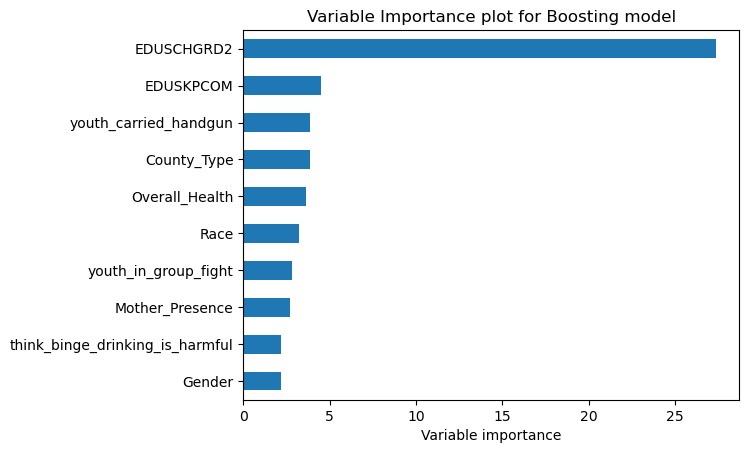

In [859]:
feature_importance = Tree_Bst_reg.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable Importance plot for Boosting model')